<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0703/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

準備資料多寡 = 問題難易度(欄位多寡)

1. 機器學習: k-w
2. 深度學習: w-10w

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
# DataFrame(2D) Series(1D)
data = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
data["ans"] = diabetes["target"]
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ans
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [2]:
from sklearn.model_selection import train_test_split
x = data.drop("ans", axis=1)
y = data["ans"]
# [90% x, 10% x, 90% y, 10% y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [3]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 's5 <= -0.004\nsquared_error = 5984.939\nsamples = 397\nvalue = 151.579'),
 Text(0.25, 0.5, 'bmi <= 0.006\nsquared_error = 3207.238\nsamples = 194\nvalue = 109.464'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2160.529\nsamples = 152\nvalue = 96.691'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4267.976\nsamples = 42\nvalue = 155.69'),
 Text(0.75, 0.5, 'bmi <= 0.015\nsquared_error = 5324.497\nsamples = 203\nvalue = 191.828'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4382.064\nsamples = 105\nvalue = 161.619'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4308.932\nsamples = 98\nvalue = 224.194')]

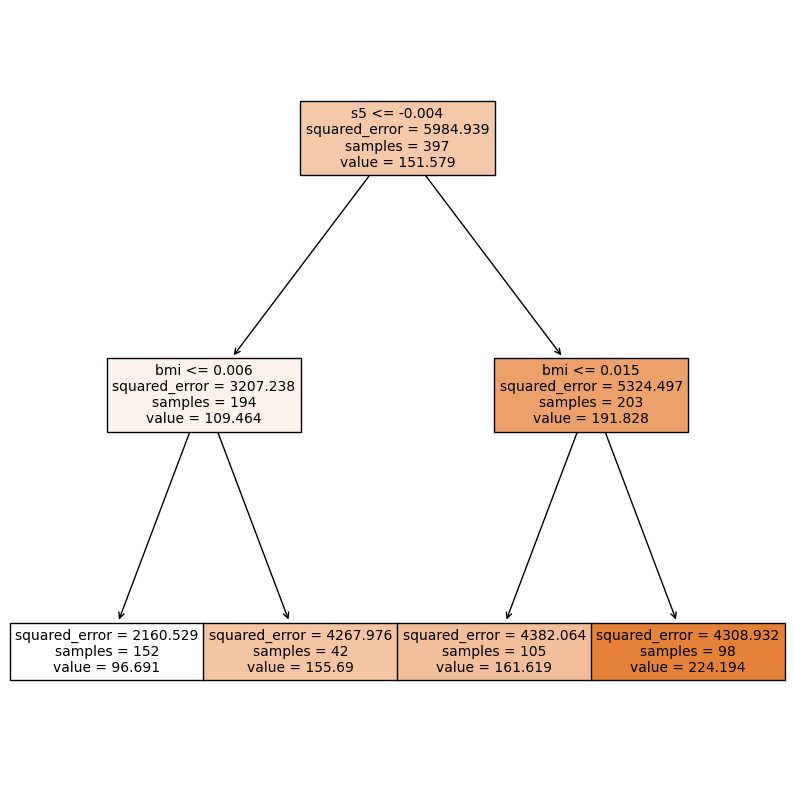

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10, 10])
plot_tree(reg,
     feature_names=x.columns,
     filled=True)